<a href="https://colab.research.google.com/github/Nuradilisayev/Data_science_course_codify/blob/master/06082020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [46]:
data=pd.read_csv('/content/AMZN.csv')

In [43]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,month
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,May
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,May
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,May


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close
count,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,277.799880,280.950590,274.278571,277.765295,277.765295
std,431.384943,435.401154,426.433643,431.130107,431.130107
min,1.406250,1.447917,1.312500,1.395833,1.395833
25%,36.680000,37.349998,36.009998,36.650002,36.650002
50%,77.937500,79.750000,76.290001,78.050003,78.050003
75%,304.000000,306.700012,300.750000,304.130005,304.130005
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5529 non-null   datetime64[ns]
 1   Open       5529 non-null   float64       
 2   High       5529 non-null   float64       
 3   Low        5529 non-null   float64       
 4   Close      5529 non-null   float64       
 5   Adj Close  5529 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 259.3 KB


In [47]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')

In [48]:
data['month']=data['Date'].dt.month_name()

In [49]:
data['day']=data['Date'].dt.day_name()

In [51]:
data['year']=data['Date'].dt.year

In [62]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,month,day,year
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,May,Thursday,1997
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,May,Friday,1997
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,May,Monday,1997


In [73]:
data.iloc[:,1:].groupby(['year','month', 'day']).agg([min, max, np.mean]).to_csv('Aggregated_data.csv')

In [74]:
data.iloc[:,1:].groupby(['year','month', 'day']).min()

Open         High  ...        Close    Adj Close
year month  day                                  ...                          
1997 August Friday        2.104167     2.125000  ...     2.114583     2.114583
            Monday        2.052083     2.052083  ...     2.041667     2.041667
            Thursday      2.135417     2.171875  ...     2.114583     2.114583
            Tuesday       2.093750     2.208333  ...     2.166667     2.166667
            Wednesday     2.187500     2.187500  ...     2.166667     2.166667
...                            ...          ...  ...          ...          ...
2019 March  Wednesday  1683.000000  1697.750000  ...  1668.949951  1668.949951
     May    Friday     1949.000000  1964.400024  ...  1962.459961  1962.459961
            Monday     1917.979980  1959.000000  ...  1950.550049  1950.550049
            Thursday   1913.329956  1921.550049  ...  1900.819946  1900.819946
            Wednesday  1933.089966  1943.640015  ...  1911.520020  1911.520020

[1324 rows x 5 columns]

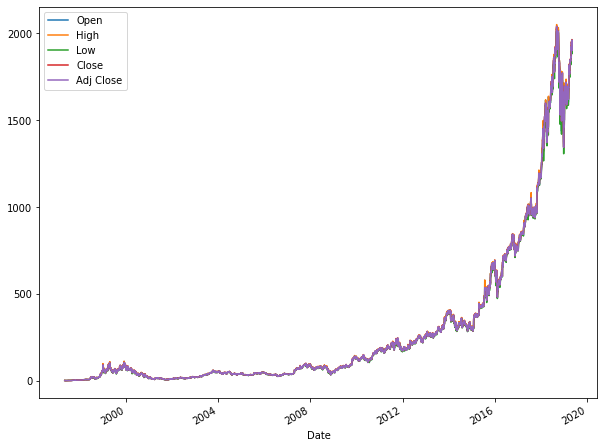

In [84]:
data.iloc[:,:-1].plot.line(x='Date', figsize=(10,8))

In [90]:
data.index=data['year']

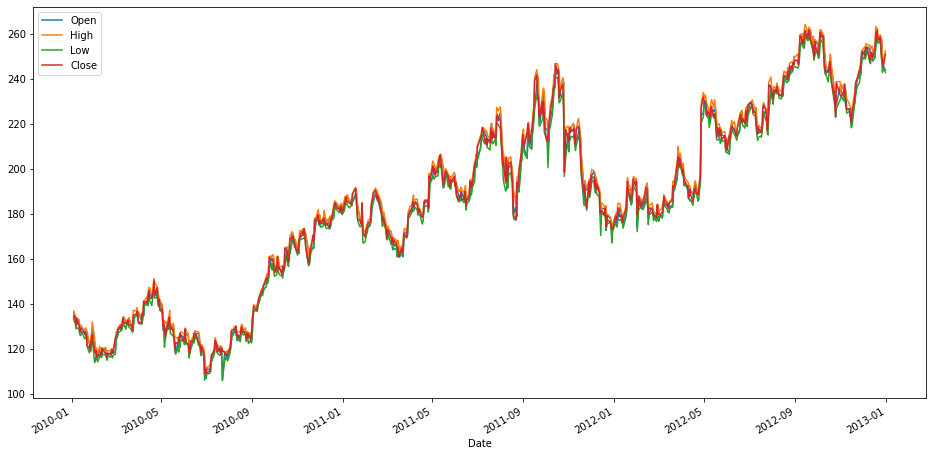

In [94]:
data.loc['2010':'2012',['Open','High','Low','Close','Date']].plot.line(x='Date', figsize=(16,8))

In [95]:
data.resample('M', on='Date').mean()

,Open,High,Low,Close,Adj Close,year
Date,,,,,,
1997-05-31,1.686553,1.722538,1.533144,1.588542,1.588542,1997
1997-06-30,1.547867,1.578373,1.503968,1.537699,1.537699,1997
1997-07-31,2.168561,2.267045,2.104640,2.205493,2.205493,1997
1997-08-31,2.222966,2.274306,2.154018,2.231399,2.231399,1997
1997-09-30,3.424107,3.634921,3.283730,3.492560,3.492560,1997
...,...,...,...,...,...,...
2019-01-31,1632.345232,1657.303816,1612.696667,1640.032389,1640.032389,2019
2019-02-28,1626.132626,1640.095806,1612.198955,1626.937365,1626.937365,2019
2019-03-31,1719.849040,1737.247634,1705.416190,1722.491909,1722.491909,2019


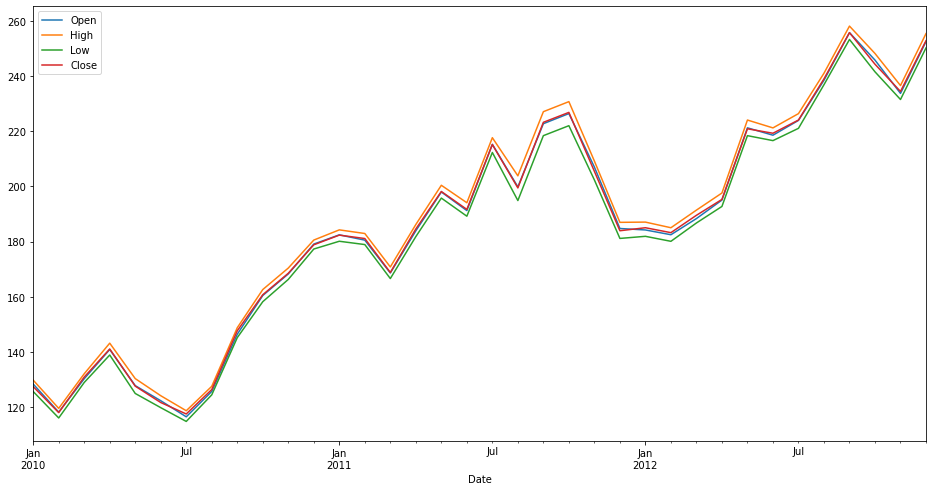

In [98]:
data.loc['2010':'2012',['Open','High','Low','Close','Date']].resample('M', on='Date').mean().plot.line(figsize=(16,8))